# Building a Contemporary Music Recommendation System

## Kaggle Dataset

We first begin by importing the necessary libraries, and the dataset of songs we will be using for this project. The dataset is retrieved from https://www.kaggle.com/datasets/ektanegi/spotifydata-19212020. It contains a dataset of 169k Spotify songs from 1921-2020, containing tracks from artists with 1 million+ listeners on Spotify. It was created using the Spotify Web API. 

We originally tried to utilize data from a 600k dataset of songs, but quickly realized that songs across cultures do not translate effectively. This dataset had songs from all languages, with no way to understand which song was English or not. When the user gives an English song to match, we wouldn't want to give them an Dutch song in return! Thus, we modified our dataset to have relevant songs in English, and the user will be able to choose from this set.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

songs_data = pd.read_csv("kaggle/data.csv")

songs_data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [11]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Now, we can see the different features of a song in the dataset. Each song has quantitative values for qualitative features - such as danceability and acousticness! We can use this to our advantage when recommending a song for the user. 

Next, we remove null values and duplicates from our dataset.

In [12]:
songs_data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [13]:
songs_data = songs_data.dropna()
songs_data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


There may be duplicate songs from different album release versions, and they have different IDs. For instance, there are two songs of Harry Styles' "Adore You." Thus, we remove duplicates based solely upon name of the song and the artist.

In [14]:
songs_data[songs_data['name']=='Adore You']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87868,0.0237,['Harry Styles'],0.676,207133,0.771,0,3jjujdWJ72nww5eGnfs2E7,0.000007,8,0.102,-3.675,1,Adore You,88,2019-12-13,0.0483,99.048,0.569,2019
87883,0.0237,['Harry Styles'],0.676,207133,0.771,0,1M4qEo4HE3PRaCOM7EXNJq,0.000007,8,0.102,-3.675,1,Adore You,86,2019-12-06,0.0483,99.048,0.569,2019
97046,0.1110,['Miley Cyrus'],0.583,278747,0.655,0,5AnCLGg35ziFOloEnXK4uu,0.000004,0,0.113,-5.407,1,Adore You,70,2013-10-04,0.0315,119.759,0.201,2013


In [15]:
songs_data = songs_data.drop_duplicates(subset = ['name', 'artists'])
songs_data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020


In [16]:
songs_data[songs_data['name']=='Adore You']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87868,0.0237,['Harry Styles'],0.676,207133,0.771,0,3jjujdWJ72nww5eGnfs2E7,0.000007,8,0.102,-3.675,1,Adore You,88,2019-12-13,0.0483,99.048,0.569,2019
97046,0.1110,['Miley Cyrus'],0.583,278747,0.655,0,5AnCLGg35ziFOloEnXK4uu,0.000004,0,0.113,-5.407,1,Adore You,70,2013-10-04,0.0315,119.759,0.201,2013


## Exploratory Data Analysis

Next, we attempt to analyze our dataset. Since we are hoping to create a contemporary song recommendation system, it would be useful to understand changes in music trends over time. We also group the songs by decade.

In [17]:
songs_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,156608.000000,156608.000000,1.566080e+05,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000
mean,0.495783,0.537458,2.310463e+05,0.487088,0.086905,0.163163,5.200967,0.207698,-11.393035,0.707505,31.156588,0.096316,116.896800,0.531012,1977.204511
std,0.376842,0.175659,1.221553e+05,0.267400,0.281697,0.309991,3.515506,0.177673,5.665935,0.454910,21.513933,0.154385,30.790044,0.262406,25.671797
min,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.095700,0.416000,1.706400e+05,0.262000,0.000000,0.000000,2.000000,0.098700,-14.514000,0.000000,12.000000,0.035000,93.363750,0.321000,1956.000000
50%,0.499000,0.547000,2.080405e+05,0.478000,0.000000,0.000214,5.000000,0.136000,-10.499000,1.000000,33.000000,0.045300,114.765500,0.543000,1978.000000
75%,0.890000,0.667000,2.625330e+05,0.708000,0.000000,0.092125,8.000000,0.264000,-7.132750,1.000000,48.000000,0.076800,135.750250,0.748000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,97.000000,0.969000,244.091000,1.000000,2020.000000


Here, we are taking the release date, which is in the format yyyy-mm-dd and converting it into an integer of just the year. This way, it is easier to group the songs by decade. 

In [18]:
type(songs_data['release_date'][0])


str

In [19]:
#standardize release-date strings (some which have year-month-date, and some with year) with just the year

songs_data.release_date.replace({'-.*': ''}, regex=True, inplace=True)

/var/folders/z7/0bysc5hx1211ddn6gf14xzvc0000gn/T/ipykernel_56728/2756862938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_data.release_date.replace({'-.*': ''}, regex=True, inplace=True)


In [20]:
print(songs_data['release_date'])

0         1928
1         1928
2         1928
3         1928
4         1928
          ... 
169903    2020
169904    2020
169905    2020
169906    2020
169907    2020
Name: release_date, Length: 156608, dtype: object


In [21]:
songs_data['release_date'] = songs_data['release_date'].astype(int)
songs_data = songs_data.sort_values(by='release_date')

songs_data[songs_data['name']=='Adore You']


/var/folders/z7/0bysc5hx1211ddn6gf14xzvc0000gn/T/ipykernel_56728/3018967004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_data['release_date'] = songs_data['release_date'].astype(int)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
97046,0.1110,['Miley Cyrus'],0.583,278747,0.655,0,5AnCLGg35ziFOloEnXK4uu,0.000004,0,0.113,-5.407,1,Adore You,70,2013,0.0315,119.759,0.201,2013
87868,0.0237,['Harry Styles'],0.676,207133,0.771,0,3jjujdWJ72nww5eGnfs2E7,0.000007,8,0.102,-3.675,1,Adore You,88,2019,0.0483,99.048,0.569,2019


Next, we will observe how many songs there are for each decade, within this specific database. We will also observe trends within the song feature over time. This will be useful information when thinking about how to give the user a contemporary song.

<Axes: xlabel='decade', ylabel='count'>

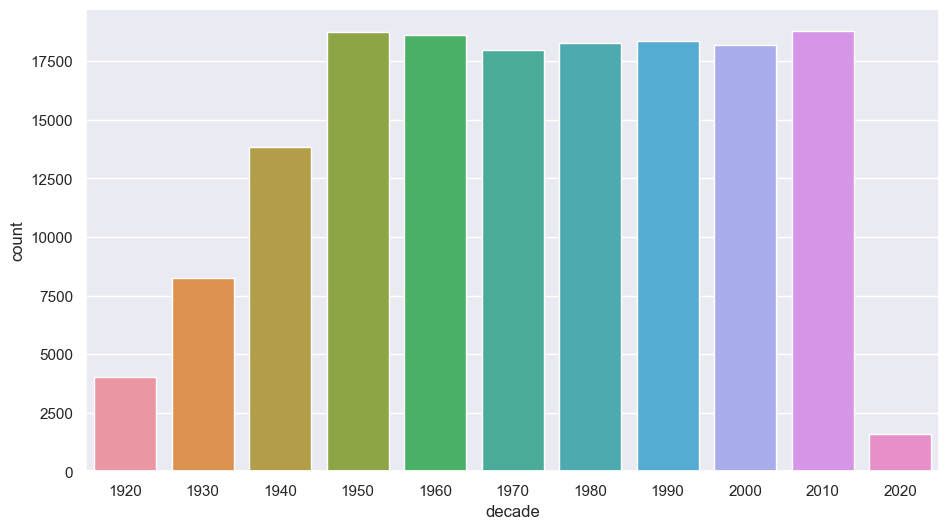

In [22]:
def get_decade(year):
    decade = int(year/10) * 10
    return decade

songs_data['decade'] = songs_data['release_date'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(x = 'decade', data = songs_data)

<Axes: xlabel='release_date', ylabel='tempo'>

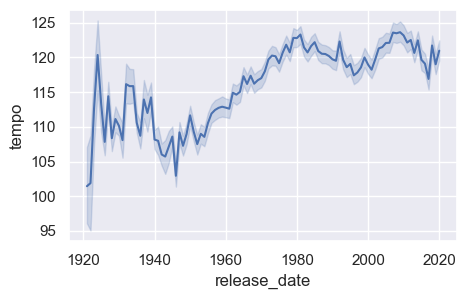

In [23]:
sns.set(rc={'figure.figsize':(5 ,3)})
sns.lineplot(x = "release_date", y = "tempo", data = songs_data)

<Axes: xlabel='release_date', ylabel='acousticness'>

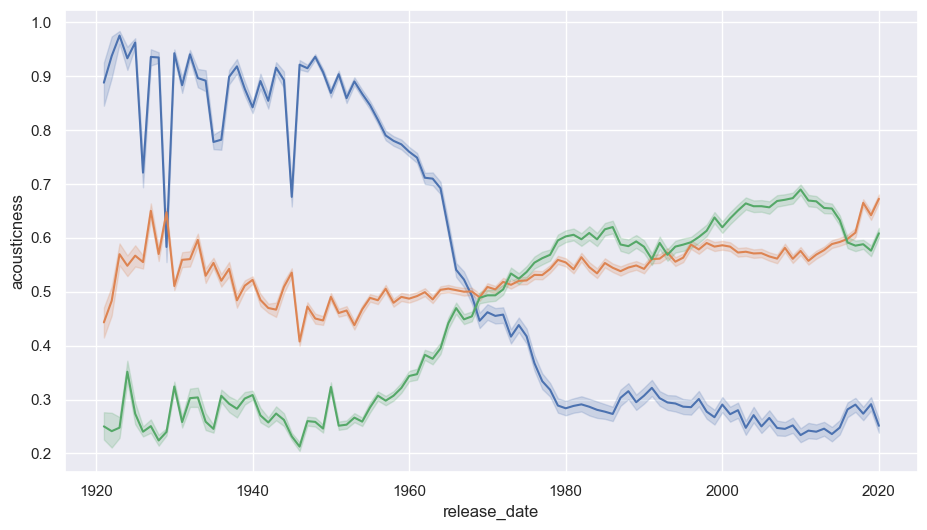

In [24]:
new_songsdf = songs_data.sample(n = 1000)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.lineplot(x = "release_date", y = "acousticness", data = songs_data)
sns.lineplot(x = "release_date", y = "danceability", data = songs_data)
sns.lineplot(x = "release_date", y = "energy", data = songs_data)

## Model 1: Similar Songs using K-Nearest Neighbors

The k-nearest neighbors (k-NN) algorithm finds similar elements given a certain query point, perfect for our usage! 

We will only query with songs from after 2015, as we are trying to give the user modern songs. This dataset is also quite large, so we will take a random tracks from the most modern decade. The query point for this algorithm will be the song that the user inputs. The k value is the number of similar songs that the user requests.

In [25]:
df = songs_data[songs_data['release_date'] > 2015]
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade
55216,0.033300,['$uicideBoy$'],0.718,161750,0.806,1,0VEHWGFb33FO0OREIjH1DZ,0.000002,4,0.1510,-6.114,0,Say Cheese And Die,55,2016,0.1160,94.961,0.266,2016,2010
47634,0.505000,['Kings of Leon'],0.560,329667,0.320,0,41QhRnFDdhMLtR8tmnolbr,0.472000,8,0.1100,-14.340,1,WALLS,64,2016,0.0313,82.511,0.107,2016,2010
47633,0.129000,"['Bomba Estéreo', 'Tainy']",0.764,251773,0.590,0,5LciLoxa1gK70yIUeoHgRx,0.008470,7,0.0851,-4.292,1,To My Love - Tainy Remix,70,2016,0.0395,99.996,0.281,2016,2010
47632,0.687000,['RADWIMPS'],0.372,537653,0.426,0,3A4FRzgve9BjfKbvVXRIFO,0.007840,11,0.1090,-8.421,1,Sparkle - movie ver.,66,2016,0.0339,123.993,0.287,2016,2010
47631,0.000003,['Gojira'],0.333,212653,0.959,0,5uunXHE4kIW6uS4HWAXaOQ,0.056300,2,0.2990,-4.348,1,Silvera,60,2016,0.0720,137.052,0.242,2016,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161409,0.034900,"['Kygo', 'Sandro Cavazza']",0.614,217766,0.709,0,745bEQatiiXDtBe1AdQY2P,0.000000,11,0.0904,-5.742,0,Beautiful,72,2020,0.0428,123.843,0.269,2020,2020
161410,0.003450,"['Elevation Worship', 'Brandon Lake']",0.286,452499,0.769,0,0pNizrRmvu5S16fH6ccm0v,0.000000,11,0.9110,-6.353,1,Graves Into Gardens (Live) (feat. Brandon Lake),67,2020,0.0539,139.442,0.128,2020,2020
161411,0.238000,"['Anuel AA', 'Farruko', 'Zion']",0.624,226160,0.888,1,5p3JJehpKHjr9pJT5eD2Lz,0.000000,2,0.3170,-2.130,1,Que Se Joda,75,2020,0.0990,180.088,0.824,2020,2020
161402,0.176000,['YoungBoy Never Broke Again'],0.738,145851,0.678,1,485RHcQUM5qotAlfutUhwT,0.000000,11,0.2500,-6.596,0,Ain't Easy,65,2020,0.1340,79.002,0.514,2020,2020


In [26]:
def queryCols(queryID, query_idx, songsData, columns, k):
    
    new_songs = songsData[columns].copy(deep=True)
    
    new_songs['dist'] = new_songs.apply(lambda x: np.linalg.norm(x-query_idx), axis=1)
    new_songs = new_songs.sort_values('dist')
    new_songs.drop_duplicates()
    
    return new_songs.head(k)


In [27]:
def findSongIdx(queryID, df):
    tmp = df.copy(deep=True)
    query_idx = (tmp.index[(tmp['id'] == queryID)].tolist())[0]
    
    
    return query_idx

def songNames(df, song_arr):
    song_ids = []
    song_names = []
    
    for idx in song_arr:
        df_row = df.loc[[idx]]
        song_names.append((df_row['name'], df_row['artists']))
        song_ids.append(df_row['id'])
        
    return song_names, song_ids
        

def query(song_ID, k):
    columns = ['danceability','energy','instrumentalness','loudness','valence', 
          'tempo']
    
    idx = findSongIdx(song_ID, songs_data)
    
    querySong = songs_data[columns].loc[idx]
    
    new_recs = queryCols(song_ID, querySong, df, columns, k)
    
    songs_names, song_ids = songNames(df, new_recs.index.values)
    
    return songs_names, song_ids
    
    

We previously looked at various instances of "Adore You." Let's test out the k-nearest neighbors algorithm with Miley Cyrus's "Adore You," released in 2013. We will ask for the 10 most similar songs.

In [31]:
new_names, new_ids = query('5AnCLGg35ziFOloEnXK4uu', 10)
print(new_names)

[(144265    Drown (feat. Clinton Kane)
Name: name, dtype: object, 144265    ['Martin Garrix', 'Clinton Kane']
Name: artists, dtype: object), (97461    Freestyle
Name: name, dtype: object, 97461    ['Lil Baby']
Name: artists, dtype: object), (39879    Lava Lamp
Name: name, dtype: object, 39879    ['Cuco']
Name: artists, dtype: object), (152857    Feels Like Forever
Name: name, dtype: object, 152857    ['Kygo', 'Jamie N Commons']
Name: artists, dtype: object), (78011    New Best Friend
Name: name, dtype: object, 78011    ['Neon Trees']
Name: artists, dtype: object), (32004    Dancing in the Moonlight (feat. NEIMY)
Name: name, dtype: object, 32004    ['Jubël', 'NEIMY']
Name: artists, dtype: object), (125737    Hurts So Good
Name: name, dtype: object, 125737    ['Astrid S']
Name: artists, dtype: object), (47997    DEALER (feat. Future & Lil Baby)
Name: name, dtype: object, 47997    ['RMR', 'Future', 'Lil Baby']
Name: artists, dtype: object), (161105    Swish Swish
Name: name, dtype: object

In [32]:
new_names, new_ids = query('2aHJDove8R5ZQ5L3v8t2sL', 10)
print(new_names)

[(87605    Six Feet Under
Name: name, dtype: object, 87605    ['Billie Eilish']
Name: artists, dtype: object), (24225    Look At Me
Name: name, dtype: object, 24225    ['Freddie Gibbs', 'The Alchemist']
Name: artists, dtype: object), (7670    You're My Girl (Lost Recording #6)
Name: name, dtype: object, 7670    ['Mark Diamond']
Name: artists, dtype: object), (23966    She Wonders Why
Name: name, dtype: object, 23966    ['Astrus*']
Name: artists, dtype: object), (23886    Oceanic Calmness
Name: name, dtype: object, 23886    ['Dreams of Dreams']
Name: artists, dtype: object), (55646    Skinny Suge
Name: name, dtype: object, 55646    ['Freddie Gibbs', 'The Alchemist']
Name: artists, dtype: object), (125888    [oops]
Name: name, dtype: object, 125888    ['potsu']
Name: artists, dtype: object), (97466    One Day
Name: name, dtype: object, 97466    ['Tate McRae']
Name: artists, dtype: object), (161378    Cinnamon Girl
Name: name, dtype: object, 161378    ['Lana Del Rey']
Name: artists, dtype

Now we have a working model that outputs the ten most similar songs since 2015! In order to be a decision-making program, however, we need to explain to the user how we found their new playlist.

## Explanation of Song Choice

We will employ an English explanation generator, similar to that of the VOTE program, to explain the song choice. We begin by describing the song features compared to the average of that particular decade.

In [33]:
new_names, new_ids = query('2aHJDove8R5ZQ5L3v8t2sL', 10)
print(new_names)

[(87605    Six Feet Under
Name: name, dtype: object, 87605    ['Billie Eilish']
Name: artists, dtype: object), (24225    Look At Me
Name: name, dtype: object, 24225    ['Freddie Gibbs', 'The Alchemist']
Name: artists, dtype: object), (7670    You're My Girl (Lost Recording #6)
Name: name, dtype: object, 7670    ['Mark Diamond']
Name: artists, dtype: object), (23966    She Wonders Why
Name: name, dtype: object, 23966    ['Astrus*']
Name: artists, dtype: object), (23886    Oceanic Calmness
Name: name, dtype: object, 23886    ['Dreams of Dreams']
Name: artists, dtype: object), (55646    Skinny Suge
Name: name, dtype: object, 55646    ['Freddie Gibbs', 'The Alchemist']
Name: artists, dtype: object), (125888    [oops]
Name: name, dtype: object, 125888    ['potsu']
Name: artists, dtype: object), (97466    One Day
Name: name, dtype: object, 97466    ['Tate McRae']
Name: artists, dtype: object), (161378    Cinnamon Girl
Name: name, dtype: object, 161378    ['Lana Del Rey']
Name: artists, dtype